In [1]:
#importing necessary packages
from bs4 import BeautifulSoup
import requests
import pandas as pd
import urllib3
from urllib.request import urlopen
import re
%matplotlib inline

# Notes on urls
-2017: The end of the url has an undercase state name. For example 'https://ucr.fbi.gov/crime-in-the-u.s/2017/crime-in-the-u.s.-2017/tables/table-8/table-8-state-cuts/alabama.xls'. For the states with two names, there is simply a hyphin (sp?) in the middle. Example: 'https://ucr.fbi.gov/crime-in-the-u.s/2017/crime-in-the-u.s.-2017/tables/table-8/table-8-state-cuts/new-hampshire.xls'. Another thing for us to perhaps scrape in the future would be zip codes so that we can link this dataframe with the dataframe received from Ameritrust.
-2016: The same as 2017, just with the year being different (obviously). Example: 'https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-8/table-8-state-cuts/alabama.xls'.
-2015: Example: 'https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-8/table-8-state-pieces/table_8_offenses_known_to_law_enforcement_alabama_by_city_2015.xls'.
-2014: Example: 'https://ucr.fbi.gov/crime-in-the-u.s/2014/crime-in-the-u.s.-2014/tables/table-8/table-8-by-state/Table_8_Offenses_Known_to_Law_Enforcement_by_Alabama_by_City_2014.xls'
-2013: Example: https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_alabama_by_city_2013.xls
-2012: Example: 'https://ucr.fbi.gov/crime-in-the-u.s/2012/crime-in-the-u.s.-2012/tables/8tabledatadecpdf/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_by_alabama_by_city_2012.xls'


Looking at the Crime Data page for the state of Alabama, I came up with two different approaches to try to obtain the data from the website. The first option that I considered was downloading the excel file version of the table. While that would be easy to do, I figured instead of taking up storage, we could just store the data in the code file. One reason that would be easier is that it would not rely on the environment as much to run. A con that I think I am just starting to consider is that it could be vulnerable to broken links, so perhaps I should write a csv file of the datarame that I obtain here, so that we have a file to go off of, but also a model for loading FBI data in the future.

After looking at the html code, I was able to find an object (?) of the table class, which is easy to scrape. This should be able to be replicated for every state page. We need a way to access all of the data pages, which is where the home page ('https://ucr.fbi.gov/crime-in-the-u.s/2017/crime-in-the-u.s.-2017/tables/table-8/table-8.xls/view') will come in handy. Here I will pull all the links referenced on the page and use that in order to send us to each page.

I realized that going from the landing page was a stupid approach, due to the fact that obtaining a list of US states is much easier than that.

In [2]:
states = pd.read_csv("states.csv")

In [3]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
State           51 non-null object
Abbreviation    51 non-null object
dtypes: object(2)
memory usage: 896.0+ bytes


In [3]:
#Setting up df for web scraping
states['URL_State1617'] = states['State'].astype(str).str.lower().str.replace(" ","-")
states['URL_State121315'] = states['State'].astype(str).str.lower().str.replace(" ","_")
states['URL_State14'] = states['State'].astype(str).str.replace(" ","_")
states.head()

,State,Abbreviation,URL_State1617,URL_State121315,URL_State14
0,Alabama,AL,alabama,alabama,Alabama
1,Alaska,AK,alaska,alaska,Alaska
2,Arizona,AZ,arizona,arizona,Arizona
3,Arkansas,AR,arkansas,arkansas,Arkansas
4,California,CA,california,california,California


In [4]:
#2017
#After base_url insert year
base_url = 'https://ucr.fbi.gov/crime-in-the-u.s/'
#Insert Year
pt2_url = '/crime-in-the-u.s.-'
#Insert Year
pt3_url = '/tables/table-8/table-8-state-cuts/'
#Insert State

#2016
#After base_url insert year
#base_url
#Insert Year
#pt2_url
#Insert Year
pt3_url3 = '/tables/table-6/table-6-state-cuts/'
#Insert State

#2015
#base_url
#Insert Year
#pt2_url
#Insert Year
pt3_url1 = '/tables/table-8/table-8-state-pieces/table_8_offenses_known_to_law_enforcement_'
#Insert State
pt4_url1 = '_by_city_'
#insert year

#2014
#base_url
#Insert Year
#pt2_url
#Insert Year
pt3_url2 = '/tables/table-8/table-8-by-state/Table_8_Offenses_Known_to_Law_Enforcement_by_'
#Insert State
pt4_url2 = '_by_City_'
#Insert Year

#2013
pt3_url3 = '/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_'
pt4_url3 = '_by_city_2013.xls'
#2012
pt3_url4 = '/tables/8tabledatadecpdf/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_by_'
pt4_url4 = '_by_city_2012.xls'

In [5]:
for i in states['URL_State1617']:
    states.loc[states['URL_State1617']==i,'Full_URL17'] = base_url+'2017'+pt2_url+'2017'+pt3_url+i+'.xls'
    states.loc[states['URL_State1617']==i,'Full_URL16'] = base_url+'2016'+pt2_url+'2016'+pt3_url3+i+'.xls'
for i in states['URL_State121315']:
    states.loc[states['URL_State121315']==i,'Full_URL15'] = base_url+'2015'+pt2_url+'2015'+pt3_url1+i+pt4_url1+'2015.xls'
    states.loc[states['URL_State121315']==i,'Full_URL13'] = base_url+'2013'+pt2_url+'2013'+pt3_url3+i+pt4_url3
    states.loc[states['URL_State121315']==i,'Full_URL12'] = base_url+'2012'+pt2_url+'2012'+pt3_url4+i+pt4_url4
for i in states['URL_State14']:
    states.loc[states['URL_State14']==i,'Full_URL14'] = base_url+'2014'+pt2_url+'2014'+pt3_url2+i+pt4_url2+'2014.xls'
states.head()

,State,Abbreviation,URL_State1617,URL_State121315,URL_State14,Full_URL17,Full_URL16,Full_URL15,Full_URL13,Full_URL12,Full_URL14
0,Alabama,AL,alabama,alabama,Alabama,https://ucr.fbi.gov/crime-in-the-u.s/2017/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2016/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2015/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2013/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2012/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2014/crim...
1,Alaska,AK,alaska,alaska,Alaska,https://ucr.fbi.gov/crime-in-the-u.s/2017/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2016/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2015/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2013/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2012/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2014/crim...
2,Arizona,AZ,arizona,arizona,Arizona,https://ucr.fbi.gov/crime-in-the-u.s/2017/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2016/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2015/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2013/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2012/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2014/crim...
3,Arkansas,AR,arkansas,arkansas,Arkansas,https://ucr.fbi.gov/crime-in-the-u.s/2017/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2016/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2015/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2013/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2012/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2014/crim...
4,California,CA,california,california,California,https://ucr.fbi.gov/crime-in-the-u.s/2017/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2016/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2015/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2013/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2012/crim...,https://ucr.fbi.gov/crime-in-the-u.s/2014/crim...


In [6]:
print(states.loc[states['State']=='Alabama','Full_URL12'].values[0])

https://ucr.fbi.gov/crime-in-the-u.s/2012/crime-in-the-u.s.-2012/tables/8tabledatadecpdf/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_by_alabama_by_city_2012.xls


In [7]:
#looping through each state's url to pull the table from the webpage for 2017

def scraping_fbi(year, df_name):
    check = re.findall("20(.+)",str(year))[0]
    full_url_stored = 'Full_URL'+check
    failures = []
    for x in states[full_url_stored]:
        try:
            website_url1 = requests.get(x).text
            soup = BeautifulSoup(website_url1,'lxml')
            table = soup.find('table',{'class':'data'})
            #reading the table into a dataframe
            df = pd.read_html(str(table))
            table_1 = df[0]
            try:
                table_1.rename(columns={"State":"City"}, inplace = True)
            except:
                continue
            #Need to create another dataframe to allow us to get the propper state for each row
            current_state = states.loc[states[full_url_stored] == x,'State'].values[0]
            table_1['State'] = current_state
            table_1['Year'] = year
            df_name = df_name.append(table_1).fillna(0)
        except:
            failures.append(i)
    return df_name

In [8]:
df_total = pd.DataFrame()

In [9]:
df_total = scraping_fbi(2017,df_total)
df_total = scraping_fbi(2016,df_total)
df_total = scraping_fbi(2015,df_total)
df_total = scraping_fbi(2014,df_total)
df_total = scraping_fbi(2013,df_total)
df_total = scraping_fbi(2012,df_total)

C:\Users\ehelchen\AppData\Local\Continuum\anaconda4\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [10]:
df_total_test = df_total

In [11]:
df_total_test.describe()

,Aggravatedassault,Arson,Arson1,Arson2,Arson3,Arson4,Burglary,Forciblerape,Larceny-theft,Motorvehicletheft,...,Propertycrime,Rape,Rape(legacydefinition)2,Rape(legacydefinition)3,Rape(reviseddefinition)1,Rape(reviseddefinition)2,Rape1,Robbery,Violentcrime,Year
count,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,...,42506.000000,42506.0,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000
mean,60.754835,2.670117,0.107985,0.157084,0.482285,0.008611,130.749259,1.091893,476.371312,61.151461,...,666.849856,0.0,1.003529,0.019691,3.971769,0.025549,2.093352,30.776337,99.324378,2014.248859
std,492.133365,22.065092,2.889277,4.327620,8.015012,0.503250,656.438425,12.799722,2369.271992,427.530347,...,3354.396692,0.0,12.889060,0.918314,34.260552,0.744098,28.385530,316.928259,834.930379,1.694775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,23.000000,1.000000,...,33.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2013.000000
50%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,85.000000,4.000000,...,115.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,2014.000000
75%,24.000000,1.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,322.000000,19.000000,...,421.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,37.000000,2015.000000
max,31767.000000,1430.000000,306.000000,379.000000,708.000000,75.000000,23733.000000,1162.000000,117931.000000,19193.000000,...,142760.000000,0.0,1112.000000,151.000000,2244.000000,97.000000,2455.000000,20201.000000,52993.000000,2017.000000


In [12]:
#Testing Function
(df_total_test['Arson']+df_total_test['Arson2']+df_total_test['Arson3']+df_total_test['Arson4']).mean()

3.318096268762057

In [13]:
#Making rape one column
def column_adder (agg_column,df_choice):
    add_list = []
    for i in df_choice.columns:
        try:
            search_term = str(agg_column)+"+."
            re.findall(search_term,i)[0]
            add_list.append(i)
        except:
            continue
    for i in add_list:
        df_choice[str(agg_column)]= df_choice[i]+df_choice[str(agg_column)]
        df_choice = df_choice.drop(columns = [i])
    return df_choice


df_total_test = column_adder('Rape',df_total_test)
df_total_test = column_adder('Arson',df_total_test)

In [14]:
df_total_test.columns

Index(['Aggravatedassault', 'Arson', 'Burglary', 'City', 'Forciblerape',
       'Larceny-theft', 'Motorvehicletheft',
       'Murder andnonnegligentmanslaughter', 'Population', 'Propertycrime',
       'Rape', 'Robbery', 'State', 'Violentcrime', 'Year'],
      dtype='object')

In [15]:
df_total_test.rename(columns={"Aggravatedassault":"Aggravated_Assault",
                              "Larceny-theft":"Larceny_Theft",
                              "Motorvehicletheft":"Motor_Vehicle_Theft",
                              "Murder andnonnegligentmanslaughter":"Murder",
                              "Violentcrime":"Violent_Crime"}, inplace = True)

In [16]:
df_total_test['Rape'] = df_total_test['Rape'] + df_total_test['Forciblerape']

In [17]:
df_total_test.describe()

,Aggravated_Assault,Arson,Burglary,Forciblerape,Larceny_Theft,Motor_Vehicle_Theft,Murder,Population,Propertycrime,Rape,Robbery,Violent_Crime,Year
count,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,4.250600e+04,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000
mean,60.754835,3.426081,130.749259,1.091893,476.371312,61.151461,1.239684,2.225172e+04,666.849856,8.205783,30.776337,99.324378,2014.248859
std,492.133365,23.960354,656.438425,12.799722,2369.271992,427.530347,11.076666,1.238791e+05,3354.396692,47.601502,316.928259,834.930379,1.694775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2012.000000
25%,2.000000,0.000000,6.000000,0.000000,23.000000,1.000000,0.000000,2.278000e+03,33.000000,0.000000,0.000000,2.000000,2013.000000
50%,6.000000,0.000000,21.000000,0.000000,85.000000,4.000000,0.000000,5.981500e+03,115.000000,1.000000,1.000000,10.000000,2014.000000
75%,24.000000,1.000000,72.000000,0.000000,322.000000,19.000000,0.000000,1.692200e+04,421.000000,5.000000,7.000000,37.000000,2015.000000
max,31767.000000,1430.000000,23733.000000,1162.000000,117931.000000,19193.000000,653.000000,8.616333e+06,142760.000000,2455.000000,20201.000000,52993.000000,2017.000000


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

In [27]:
First_Subset = df_total_test[['Population','Murder','Propertycrime','Violent_Crime','City','State','Year']]

In [28]:
First_Subset.head()

,Population,Murder,Propertycrime,Violent_Crime,City,State,Year
0,2590.0,0,66.0,12.0,Abbeville,Alabama,2017
1,4334.0,1,261.0,25.0,Adamsville,Alabama,2017
2,33253.0,0,527.0,74.0,Alabaster,Alabama,2017
3,21588.0,0,648.0,22.0,Albertville,Alabama,2017
4,14744.0,3,551.0,255.0,Alexander City,Alabama,2017


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000127D2367EF0>,
      dtype=object)

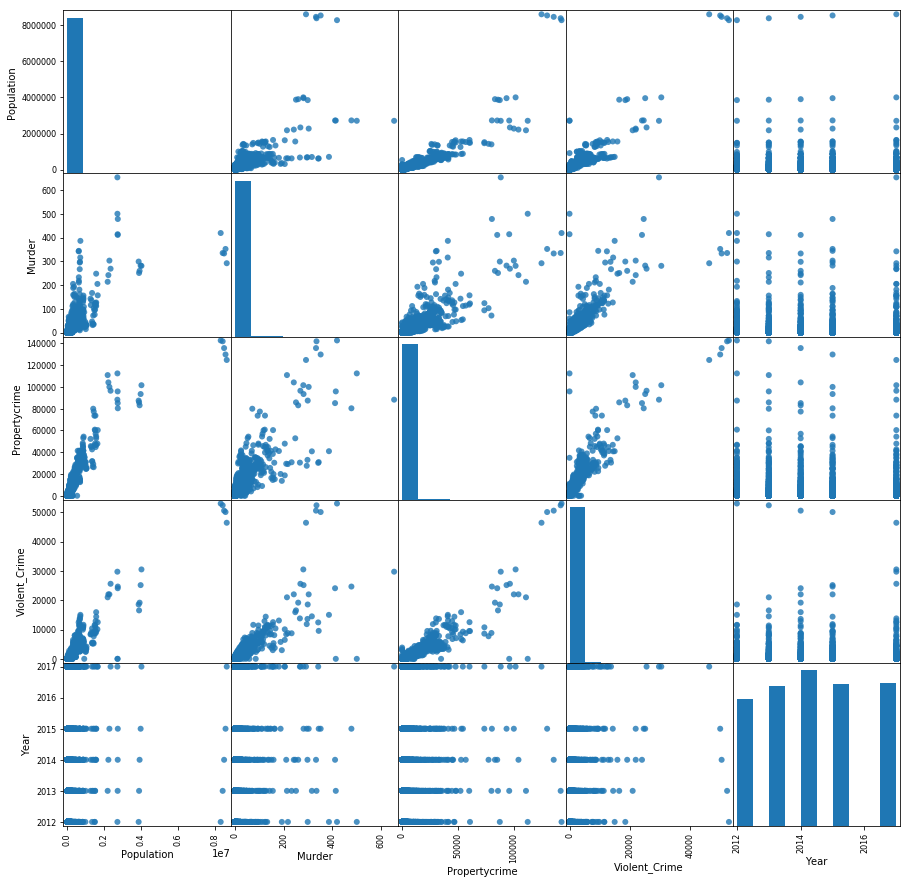

In [30]:
pd.plotting.scatter_matrix(First_Subset,figsize = (15,15),
                          marker = 'o', alpha=.8)

In [32]:
ts_df_vc = df_total_test[['Population','Violent_Crime','City','State','Year']]
ts_df_vc.head()

,Population,Violent_Crime,City,State,Year
0,2590.0,12.0,Abbeville,Alabama,2017
1,4334.0,25.0,Adamsville,Alabama,2017
2,33253.0,74.0,Alabaster,Alabama,2017
3,21588.0,22.0,Albertville,Alabama,2017
4,14744.0,255.0,Alexander City,Alabama,2017


In [33]:
ts_df_vc['vc_per_100k']= (ts_df_vc['Violent_Crime']/ts_df_vc['Population'])*100000
ts_df_vc.head()

C:\Users\ehelchen\AppData\Local\Continuum\anaconda4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Population,Violent_Crime,City,State,Year,vc_per_100k
0,2590.0,12.0,Abbeville,Alabama,2017,463.320463
1,4334.0,25.0,Adamsville,Alabama,2017,576.834333
2,33253.0,74.0,Alabaster,Alabama,2017,222.536313
3,21588.0,22.0,Albertville,Alabama,2017,101.908468
4,14744.0,255.0,Alexander City,Alabama,2017,1729.517092


In [34]:
ts_df_vc['vc_per_100k'].max()

inf